# U.S. Medical Insurance Costs

# U.S. Medical Insurance Costs

### Goals of this project
In this project I will explore how BMI, smoking, number of children, age, gender, and region affect health insurance costs.



### The code

First, we create an empty lists representing people. Later, this list will be filled with dictonaries that contain the patient data.

In [71]:
people = []

Now, we import the data from the csv to the people list. Every entry in the list is a person's data.

In [85]:
import csv
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

with open ('insurance.csv') as insurance_file:
    insurance_dict = csv.DictReader(insurance_file)
    for person in insurance_dict:
        people.append(person)

### Gender

Now we will compare the average cost between men and women. 

The average for men is 13956 dollars.
The average for women is 12569 dollars.
On average, men pay 1387 dollars more for insurance than women.


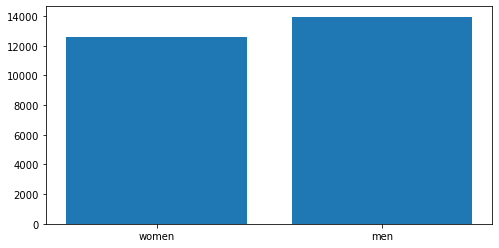

In [138]:
def compare_gender_cost(people):
    male_total_cost = 0
    num_of_male = 0
    female_total_cost = 0
    num_of_female = 0
    for person in people:
        if person['sex'] == "female":
            female_total_cost += float(person['charges'])
            num_of_female += 1
        elif person['sex'] == "male":
            male_total_cost += float(person['charges'])
            num_of_male += 1
    print("The average for men is " + str(int(male_total_cost/num_of_male)) + " dollars.")
    print("The average for women is " + str(int(female_total_cost/num_of_female)) + " dollars.")
    print("On average, men pay " + str(int(male_total_cost/num_of_male - female_total_cost/num_of_female)) + " dollars more for insurance than women.")
    gender_costs = [int(female_total_cost/num_of_female), int(male_total_cost/num_of_male)]
    gender_names = ["women", "men"]
    plt.figure(figsize=(8, 4))
    plt.bar(gender_names, gender_costs)
        
compare_gender_cost(people)

We see that men on average pay more on health insurance than women. Next, we will see how BMI affects health insurance cost. My hypothesis is that greater BMI leads to insurance being more expensive.

### BMI

The correlation is 0.1983409688336289.


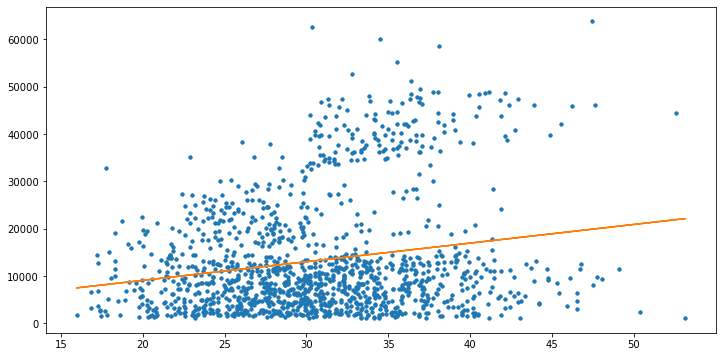

In [136]:
bmi = []
age = []
smoker = []
region = []
cost = []
children = []
for person in people:
    bmi.append(float(person["bmi"]))
    cost.append(float(person["charges"]))
    smoker.append(person["smoker"])
    age.append(float(person["age"]))
    region.append(person["region"])
    children.append(int(person["children"]))

bmi_list = np.array(bmi) 
cost_list = np.array(cost)
m, b = np.polyfit(bmi_list, cost_list, 1)

correlation, _ = pearsonr(bmi_list, cost_list)
print("The correlation is " + str(correlation) + ".")
plt.figure(figsize=(12, 6))
plt.plot(bmi_list, cost_list, ".")
plt.plot(bmi_list, bmi_list*m+b, "-")
plt.show()

So, we can see that greater BMI does lead to greater health costs. However, the the correlation coeffiecient is quite small. This menas that the data set does not follow the line very well. So, there are still many people who have low BMI and high costs, and people who have high BMI and low costs. BMI affects healthcare costs only slightly. Next, we will look at the impacts of smoking on healthcare costs.

### Smoking

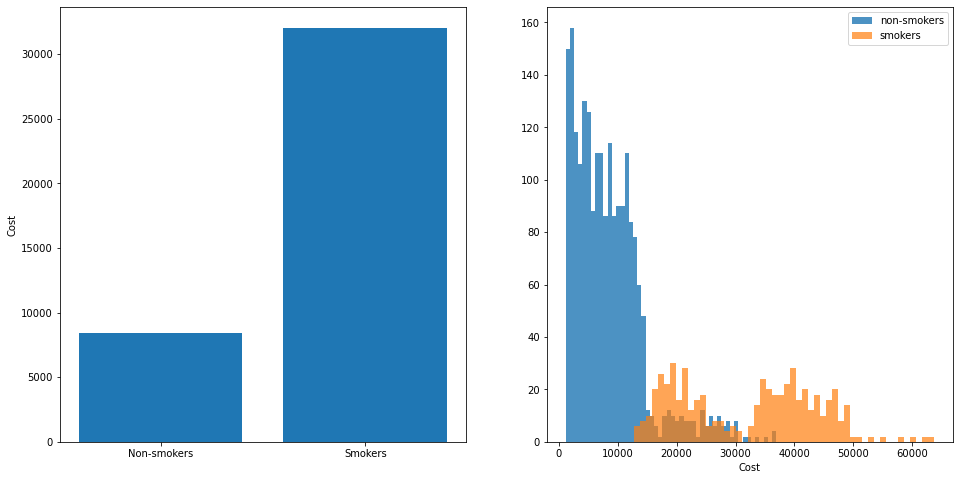

In [135]:
non_smokers = []
smokers = []
for person in people:
    if person["smoker"] == 'yes':
        smokers.append(float(person["charges"]))
    elif person["smoker"] == 'no':
        non_smokers.append(float(person["charges"]))
smoker_costs = [np.mean(non_smokers), np.mean(smokers)]
smoker_names = ["Non-smokers", "Smokers"]

plt.figure(figsize=(16, 8))
ax = plt.subplot(1, 2, 1)
plt.bar(smoker_names, smoker_costs)
plt.ylabel("Cost")

ax2 = plt.subplot(1, 2, 2)
plt.xlabel("Cost")
plt.hist(non_smokers, 50, alpha = 0.8)
plt.hist(smokers, 50, alpha = 0.7)
ax2.legend(["non-smokers", "smokers"])
plt.show()
    

Based on the data, we see that, on average, smokers pay over $3$-fold what non-smokers pay in health insurance. This means that either directly or indirectly, smoking causes a $3$-fold increase in insurance cost. 

We can also see that in the non-smokers, the majority of people are in on large group from around $2000 - 1700$.
On the other hand in the smoker group, there are $2$ clusters that are centered on $20000$ and $40000$. Next, we will look at why these two clusters occur. Perhaps BMI has a role?

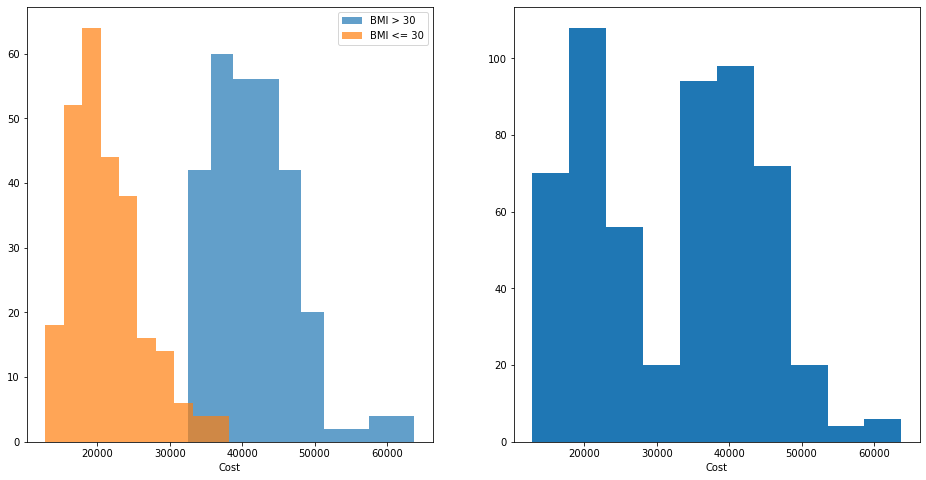

In [134]:
smoker_with_obese = []
smoker_without_obese = []
for person in people:
    if person["smoker"] == 'yes' and person["bmi"] > "30":
        smoker_without_obese.append(float(person["charges"]))
    elif person["smoker"] == 'yes' and person["bmi"] <= "30":
        smoker_with_obese.append(float(person["charges"]))

plt.figure(figsize=(16,8))
ax = plt.subplot(1, 2, 1)
plt.hist(smoker_without_obese, alpha = 0.7)
plt.hist(smoker_with_obese, alpha = 0.7)
plt.xlabel("Cost")
ax.legend(["BMI > 30", "BMI <= 30"])

ax2 = plt.subplot(1,2,2)
plt.hist(smokers)
plt.xlabel("Cost")
plt.show()
    

So, it seems that the previously unexplained $2$ humps in price difference between smokers can be expained as the effects of BMI. Within people who smoke, people that have BMI's under 30 (not obese) had siginficantly lower prices than the obese people. Now we can look at the difference of BMI in non-smoking people. 

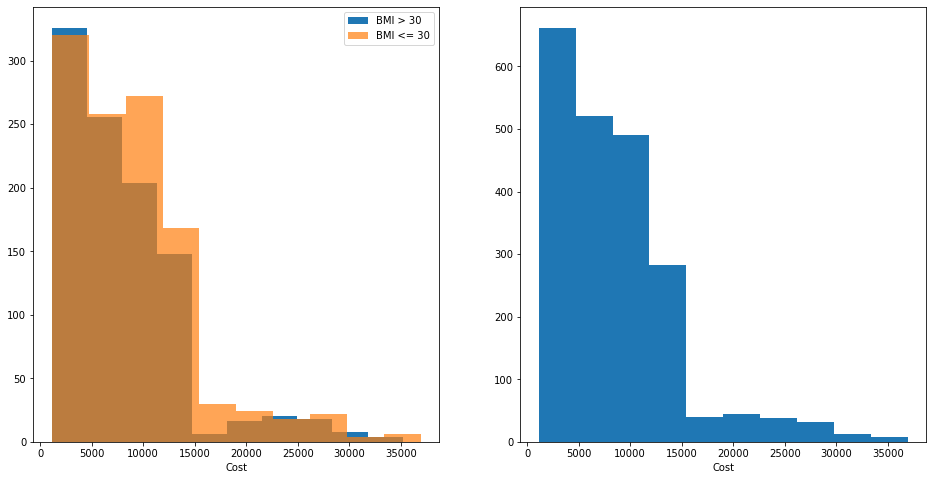

In [131]:
non_smoker_with_obese = []
non_smoker_without_obese = []
for person in people:
    if person["smoker"] == 'no' and person["bmi"] > "30":
        non_smoker_without_obese.append(float(person["charges"]))
    elif person["smoker"] == 'no' and person["bmi"] <= "30":
        non_smoker_with_obese.append(float(person["charges"]))

plt.figure(figsize=(16,8))
ax = plt.subplot(1, 2, 1)
plt.hist(non_smoker_with_obese)
plt.hist(non_smoker_without_obese, alpha = 0.7)
plt.xlabel("Cost")
ax.legend(["BMI > 30", "BMI <= 30"])

ax2 = plt.subplot(1,2,2)
plt.hist(non_smokers)
plt.xlabel("Cost")
plt.show()
    

Given this new data, it seems that BMI does not affect prices of health care in non-smoking people.

### Age

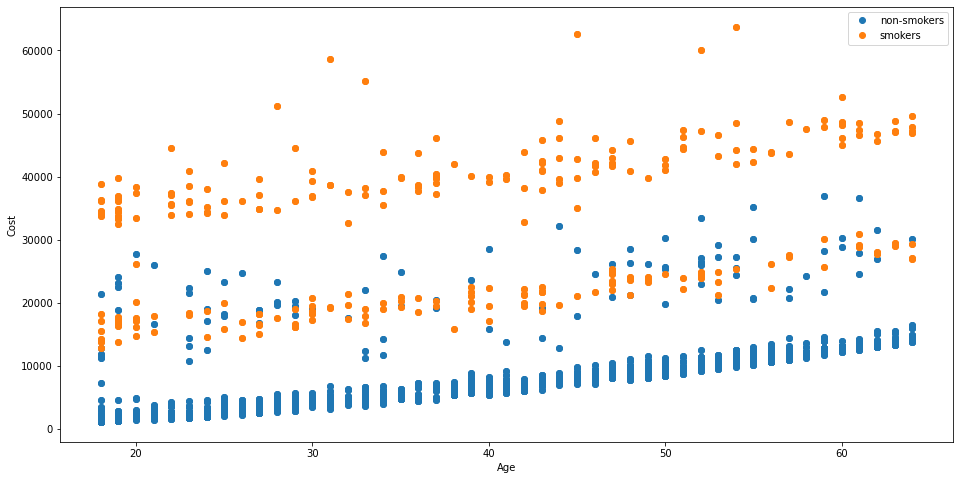

In [133]:
smoker_age = []
non_smoker_age = []
for person in people:
    if person["smoker"] == 'yes':
        smoker_age.append(float(person["age"]))
    elif person["smoker"] == 'no':
        non_smoker_age.append(float(person["age"]))

plt.figure(figsize=(16, 8))
ax = plt.subplot(1, 1, 1)
plt.plot(non_smoker_age, non_smokers, "o")
plt.plot(smoker_age, smokers, "o")
ax.legend(['non-smokers', "smokers"])
plt.xlabel("Age")
plt.ylabel("Cost")
plt.show()
    

We can see a very clear correlation between age and price. The older you are the pricier your health insurance. Next we will look at how whether you have children affects your health insurance cost.

### Number of Children

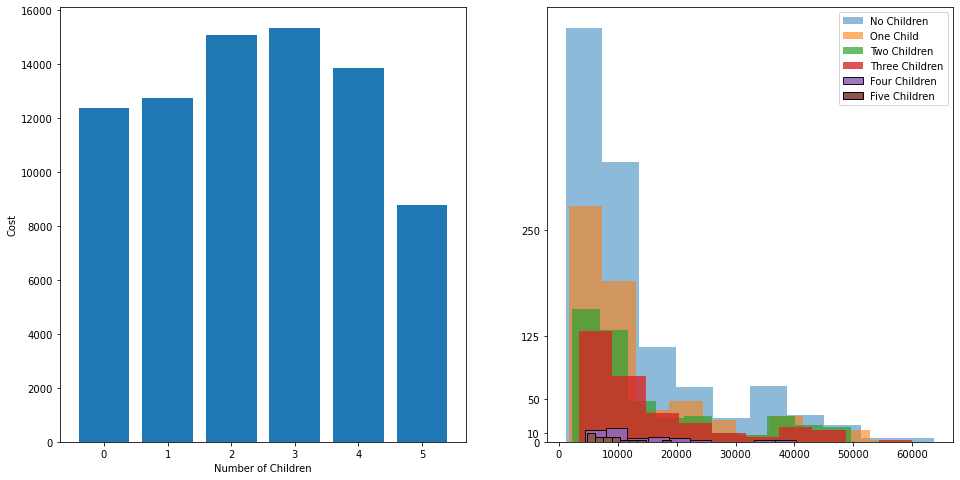

In [92]:
no_child = []
one_child = []
two_child = []
three_child = []
four_child = []
five_child = []

for person in people:
    if person["children"] == '0':
        no_child.append(float(person["charges"]))
    elif person["children"] == '1':
        one_child.append(float(person["charges"]))
    elif person["children"] == '2':
        two_child.append(float(person["charges"]))
    elif person["children"] == '3':
        three_child.append(float(person["charges"]))
    elif person["children"] == '4':
        four_child.append(float(person["charges"]))
    elif person["children"] == '5':
        five_child.append(float(person["charges"]))
        
plt.figure(figsize=(16, 8))

ax = plt.subplot(1, 2, 1)
children_means = [np.mean(no_child), np.mean(one_child), np.mean(two_child), 
                  np.mean(three_child), np.mean(four_child), np.mean(five_child)]
children_groups = ["0", "1", "2", "3", "4", "5"]
plt.bar(children_groups, children_means)
plt.xlabel("Number of Children")
plt.ylabel("Cost")

ax2 = plt.subplot(1, 2, 2)
plt.hist(no_child, alpha = 0.5)
plt.hist(one_child, alpha = 0.6)
plt.hist(two_child, alpha = 0.7)
plt.hist(three_child, alpha = 0.8)
plt.hist(four_child, alpha = 0.9, edgecolor = "black")
plt.hist(five_child, alpha = 1, edgecolor = "black")
ax2.set_yticks([0, 10, 50 ,125, 250])
ax2.legend(["No Children", "One Child", "Two Children", "Three Children", "Four Children", "Five Children"])
plt.show()

It seems like the number of children does not affect the cost of health insurance.

### Regions

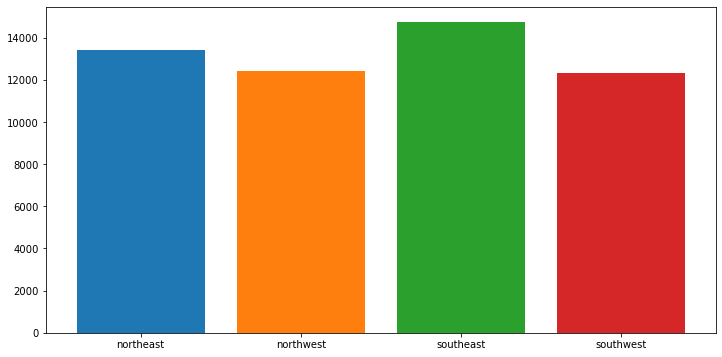

In [139]:
northeast = []
northwest = []
southeast = []
southwest = []

for person in people:
    if person["region"] == 'northeast':
        northeast.append(float(person["charges"]))
    elif person["region"] == 'northwest':
        northwest.append(float(person["charges"]))
    elif person["region"] == 'southeast':
        southeast.append(float(person["charges"]))
    elif person["region"] == 'southwest':
        southwest.append(float(person["charges"]))
        
plt.figure(figsize=(12, 6))       
plt.bar('northeast', np.mean(northeast))
plt.bar('northwest', np.mean(northwest))
plt.bar('southeast', np.mean(southeast))
plt.bar('southwest', np.mean(southwest))
ax.legend(["Northeast", "Northwest", "Southeast", "Southwest"])
plt.show()

So the most expensive region is the southeast, then the northeast, then the northwest, and the cheapest region is the southwest. The southwest's average cost is over 2000 less than the average cost of the southeast. So, each region actually has quite a significant difference in prices.

### Conclusion

In conclusion, there are many factors which affect healthcare cost. 

Age: The older you get the more expensize health insurance is.

BMI: If you smoke, being obese with increase your cost siginifcantly. If you don't BMI will not affect your cost siginifcantly.

Smoking: Smoking nearly triples your healthcare cost.

Gender: Men on average pay 1000 dollars more than women.

Region: Region affects costs slightly. These regions are northeast, northwest, southeast, southwest with southeast having the most expensive health care and northwest the cheapest.


